#  EXAMPLE 6: Calculate and plot confidence intervals for SPOD eigenvalues.
The large-eddy simulation data provided along with this example is a subset of the database of a Mach 0.9 turbulent jet described in [1] and was calculated using the unstructured flow solver Charles developed at Cascade Technologies. If you are using the database in your research or teaching, please include explicit mention of Brès et al. [1]. The test database consists of 5000 snapshots of the symmetric component (m=0) of a round turbulent jet. A physical interpretaion of the SPOD results is given in [2], and a comprehensive discussion and derivation of SPOD and many of its properties can be found in [3].

### References:
1. G. A. Brès, P. Jordan, M. Le Rallic, V. Jaunet, A. V. G. Cavalieri, A. Towne, S. K. Lele, T. Colonius, O. T. Schmidt, Importance of the nozzle-exit boundary-layer state in subsonic turbulent jets, J. of Fluid Mech. 851, 83-124, 2018
2. Schmidt, O. T. and Towne, A. and Rigas, G. and Colonius, T. and Bres, G. A., Spectral analysis of jet turbulence, J. of Fluid Mech. 855, 953–982, 2018
3. Towne, A. and Schmidt, O. T. and Colonius, T., Spectral proper orthogonal decomposition and its relationship to dynamic mode decomposition and resolvent analysis, J. of Fluid Mech. 847, 821–867, 2018

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from spod import spod
from utils import trapzWeightsPolar

In [2]:
f = h5py.File("jet_data/jetLES.mat", "r")
p = np.swapaxes(f["p"], 0, 2)
x = np.swapaxes(f["x"], 0, 1)
r = np.swapaxes(f["r"], 0, 1)
dt = f["dt"][0][0]

### SPOD with 99% confidence interval. 
This example is similar to example 3, but we also obtain the 99% confidence interval of the SPOD eigenvalues by using conflvl argument.

In [3]:
# trapezoidal quadrature weights for cylindrical coordinates
intWeights = trapzWeightsPolar(r[:, 0], x[0, :])

# SPOD using a retangular window of length 256 and 50 snaphots overlap
result = spod(
    p, window=np.ones(256), weight=intWeights, noverlap=50, dt=dt, conflvl=0.99, debug=1
)


SPOD parameters
------------------------------------
Spectrum type             : one-sided (real-valued signal)
No. of snaphots per block : 256
Block overlap             : 50
No. of blocks             : 24
Windowing fct. (time)     : user specified
Weighting fct. (space)    : user_specified
Mean                      : long-time (true) mean

Calculating temporal DFT
------------------------------------

Calculating SPOD
------------------------------------


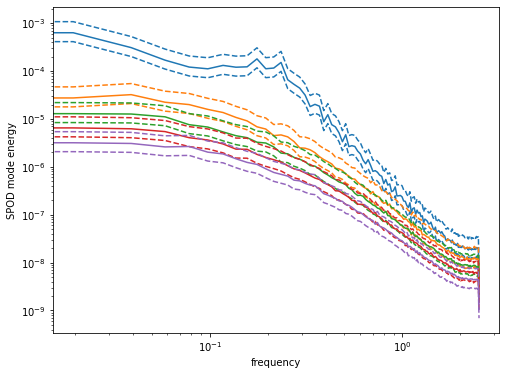

In [4]:
# Plot the SPOD spectrum with upper and lower 99% confidence levels for every 5th mode.
plt.figure(figsize=(8,6))
for mi in range(0, result["L"].shape[1], 5):
    line = plt.loglog(result["f"], result["L"][:, mi])
    color = line[-1].get_color()

    # lower confidence level
    plt.loglog(result["f"], result["Lc"][:, mi, 0], "--", color=color)

    # upper confidence level
    plt.loglog(result["f"], result["Lc"][:, mi, 1], "--", color=color)

plt.xlabel("frequency")
plt.ylabel("SPOD mode energy")
plt.show()